#Model Optimization Project - Wine

In [1]:
import numpy as np
import pandas as pd 
import os
import numpy as np
import pandas as pd  

print(os.listdir("../input"))

['winequalityN.csv']


In [ ]:
from sklearn.preprocessing import StandardScaler as ss
from sklearn.decomposition import PCA


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV                 
from sklearn.model_selection import RandomizedSearchCV    

In [2]:
from xgboost.sklearn import XGBClassifier


from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from xgboost import plot_importance


In [ ]:
#Bayes optimization

from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization
import eli5 as eli5
from eli5.sklearn import PermutationImportance
import time
import gc
import random
from scipy.stats import uniform

In [3]:

pd.set_option('display.max_columns', 100)

In [4]:
#read tge csv fule
df= pd.read_csv("../input/winequalityN.csv")

In [5]:
#view data
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6487 non-null float64
volatile acidity        6489 non-null float64
citric acid             6494 non-null float64
residual sugar          6495 non-null float64
chlorides               6495 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6488 non-null float64
sulphates               6493 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 659.9+ KB


In [7]:
print(df.shape)

(6497, 13)

In [8]:
df.columns.values

array(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [10]:
df.isnull().any()

type                    False
fixed acidity            True
volatile acidity         True
citric acid              True
residual sugar           True
chlorides                True
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                       True
sulphates                True
alcohol                 False
quality                 False
dtype: bool

In [11]:
df.dropna(axis=0,inplace=True)

In [12]:
df.shape

(6463, 13)

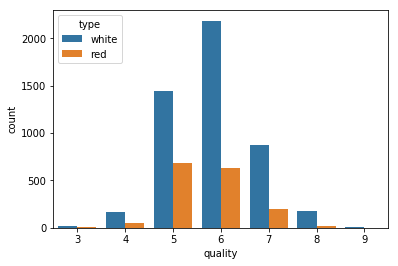

In [13]:
import seaborn as sns
sns.countplot(x = df.quality, data=df, hue='type')

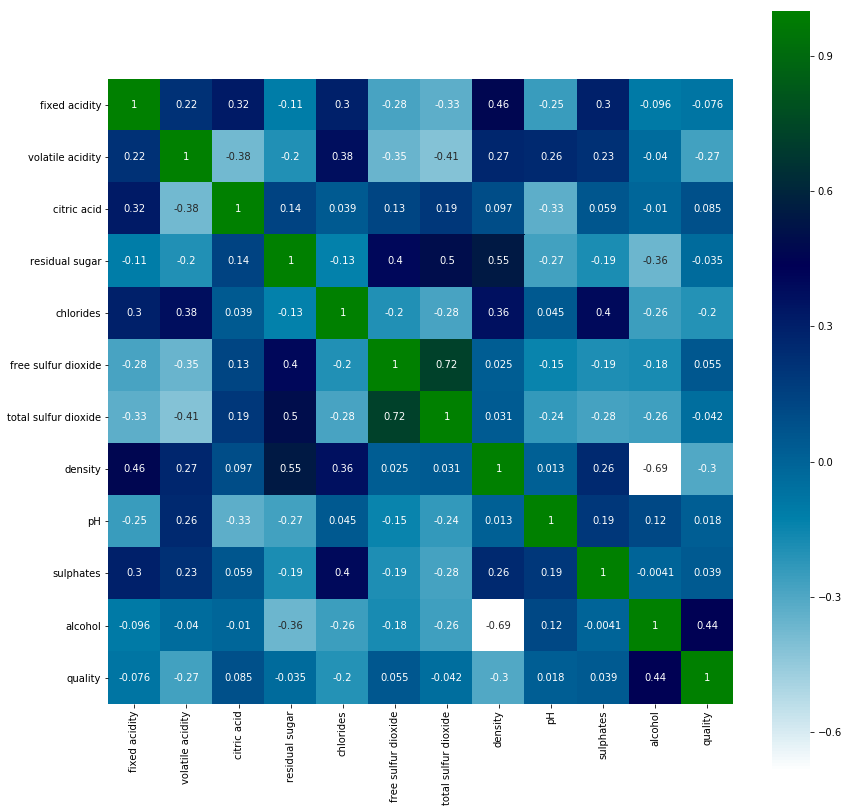

In [14]:
plt.figure(figsize=(14,14))
sns.heatmap(df.iloc[:,0:13].corr(), cbar = True,  square = True, annot=True, cmap= 'ocean_r')

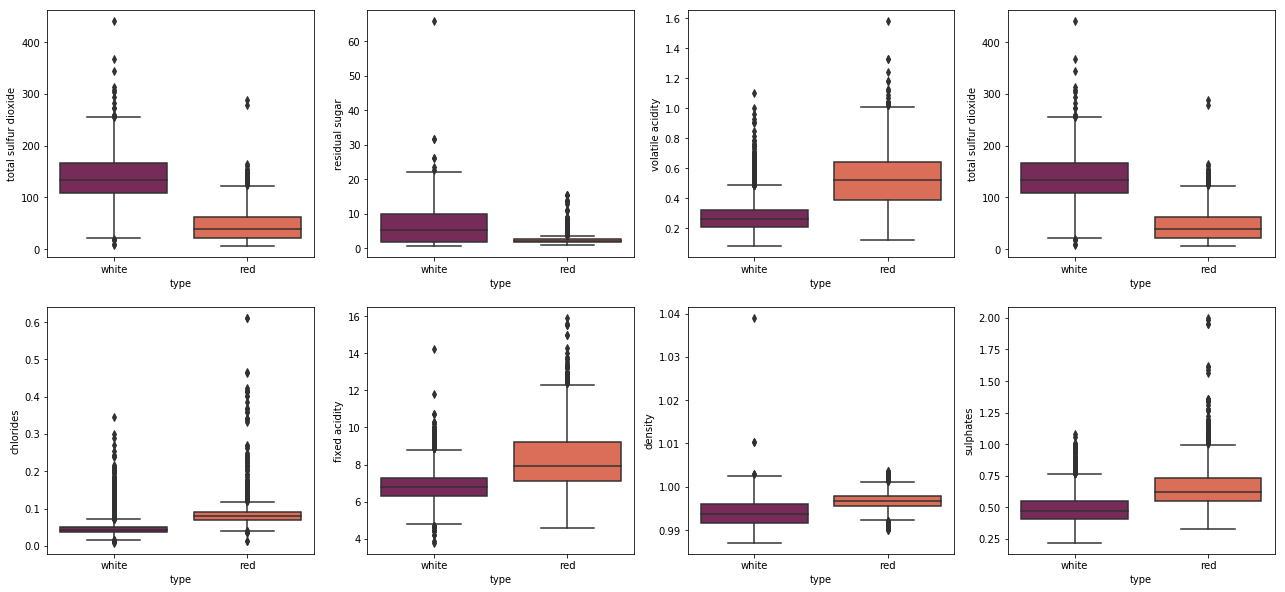

In [15]:
fig = plt.figure(figsize=(22,10))
features = ["total sulfur dioxide", "residual sugar", "volatile acidity", "total sulfur dioxide", "chlorides", "fixed acidity", "density","sulphates"]

for i in range(8):
    ax1 = fig.add_subplot(2,4,i+1)
    sns.boxplot(x="type", y=features[i],data=df, palette="rocket");

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


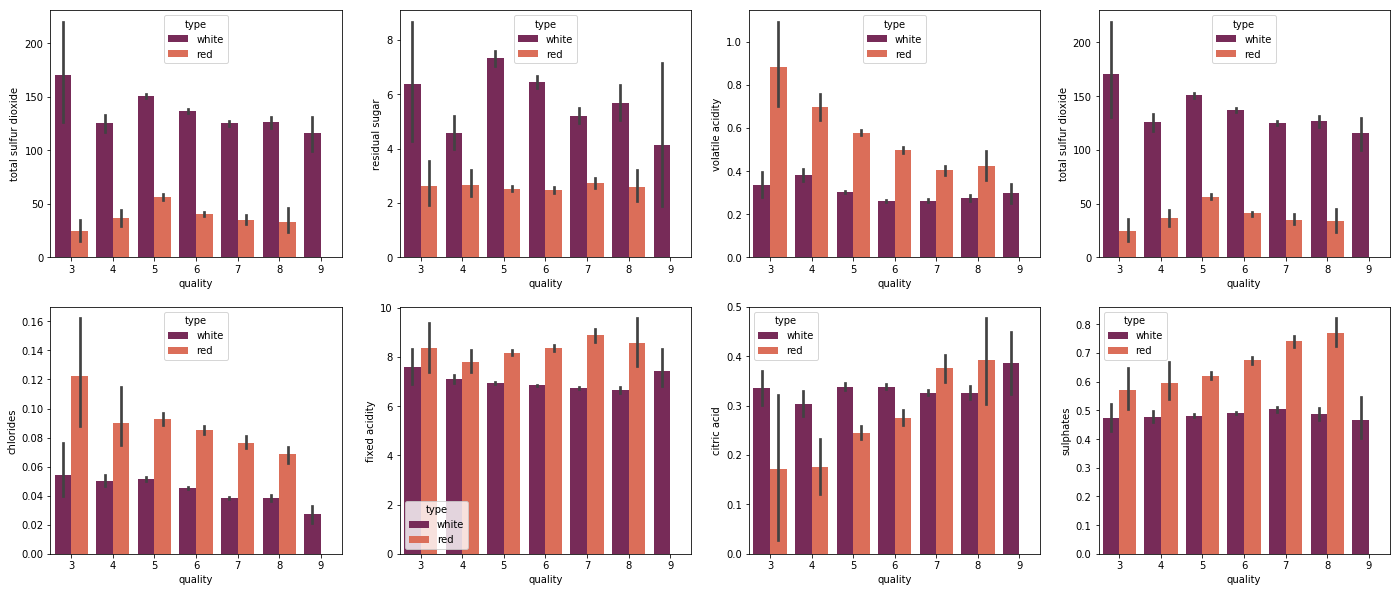

In [16]:
fig = plt.figure(figsize=(24,10))
features = ["total sulfur dioxide", "residual sugar", "volatile acidity", "total sulfur dioxide", "chlorides", "fixed acidity", "citric acid","sulphates"]

for i in range(8):
    ax1 = fig.add_subplot(2,4,i+1)
    sns.barplot(x='quality', y=features[i],data=df, hue='type', palette='rocket')

In [17]:
#Splitting data into predictors and target
X = df.iloc[ :, 1:13]
y = df.iloc[ : , 0]

In [18]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [19]:
y.head()

0    white
1    white
2    white
3    white
4    white
Name: type, dtype: object

In [20]:
#  Map Target data to '1' and '0'
y = y.map({'white':1, 'red' : 0})
y.dtype 

dtype('int64')

In [21]:
colnames = X.columns.tolist()
colnames

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [22]:
# Split dataset into train and test parts
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.30,
                                                    shuffle = True
                                                    )

In [23]:
print(X_train.shape)

(4524, 12)

In [24]:
print(X_test.shape)

(1939, 12)

In [25]:
print(y_train.shape)

(4524,)

In [26]:
print(y_test.shape)

(1939,)

In [27]:
#Creating  pipelines

#### Pipe using XGBoost and instantiating it.

steps_xg = [('sts', ss() ),
            ('pca', PCA()),
            ('xg',  XGBClassifier(silent = False,
                                  n_jobs=2)        # Specify other parameters here
            )
            ]

pipe_xg = Pipeline(steps_xg)

Grid Search

In [28]:
parameters = {'xg__learning_rate':  [0.05, 0.4],
              'xg__n_estimators':   [50,  80],
              'xg__max_depth':      [3,5],
              'pca__n_components' : [5,8]
              }          

In [29]:
clf = GridSearchCV(pipe_xg,            # pipeline object
                   parameters,         # possible parameters
                   n_jobs = 2,         # USe parallel cpu threads
                   cv =2 ,             # No of folds
                   verbose =2,         # Higher the value, more the verbosity
                   scoring = ['accuracy', 'roc_auc'],  # Metrics for performance
                   refit = 'roc_auc'   # Refitting final model on what parameters?
                                       # Those which maximise auc
                   )

In [30]:
start = time.time()
clf.fit(X_train, y_train)
end = time.time()
(end - start)/60

Fitting 2 folds for each of 16 candidates, totalling 32 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  32 out of  32 | elapsed:    8.0s finished
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


0.13864603439966838

In [31]:
f"Best Score: {clf.best_score_} "

'Best Score: 0.996163914353721 '

In [32]:
f"Best Parameter set {clf.best_params_}"

"Best Parameter set {'pca__n_components': 8, 'xg__learning_rate': 0.4, 'xg__max_depth': 3, 'xg__n_estimators': 80}"

In [33]:
y_pred_gs = clf.predict(X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [34]:
# Accuracy
accuracy_gs = accuracy_score(y_test, y_pred_gs)
f"Accuracy: {accuracy_gs * 100.0}"

'Accuracy: 99.22640536358948'

([0, 1, 2, 3], <a list of 4 Text xticklabel objects>)

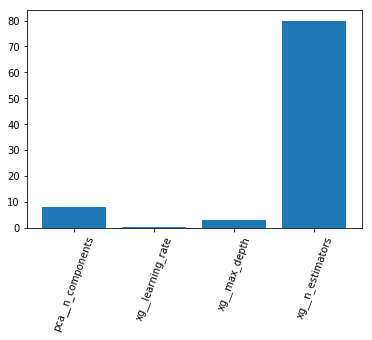

In [35]:
plt.bar(clf.best_params_.keys(), clf.best_params_.values())
plt.xticks(rotation=70)

In [36]:
# Instantiate the importance object
perm = PermutationImportance(
                            clf,
                            random_state=1
                            )

# fit data & learn
start = time.time()
perm.fit(X_test, y_test)
end = time.time()
(end - start)/60

0.009742371241251628

In [37]:
eli5.show_weights(
                  perm,
                  feature_names = colnames      # X_test.columns.tolist()
                  )

Weight,Feature
0.0106 ± 0.0033,volatile acidity
0.0086 ± 0.0014,total sulfur dioxide
0.0059 ± 0.0027,chlorides
0.0056 ± 0.0017,pH
0.0022 ± 0.0016,sulphates
0.0019 ± 0.0011,citric acid
0.0016 ± 0.0015,fixed acidity
0.0010 ± 0.0012,residual sugar
0.0009 ± 0.0012,density
0.0008 ± 0.0013,free sulfur dioxide


In [38]:
fw = eli5.explain_weights_df(
                  perm,
                  feature_names = colnames      # X_test.columns.tolist()
                  )

fw

,feature,weight,std
0,volatile acidity,0.010564,0.001638
1,total sulfur dioxide,0.008587,0.000720
2,chlorides,0.005948,0.001356
3,pH,0.005629,0.000870
4,sulphates,0.002194,0.000819
5,citric acid,0.001863,0.000559
6,fixed acidity,0.001576,0.000773
7,residual sugar,0.001039,0.000604
8,density,0.000946,0.000614
9,free sulfur dioxide,0.000819,0.000671


Random Search

In [39]:
parameters = {'xg__learning_rate':  uniform(0, 1),
              'xg__n_estimators':   range(50,80),
              'xg__max_depth':      range(3,5),
              'pca__n_components' : range(5,7)}

In [40]:
rs = RandomizedSearchCV(pipe_xg,
                        param_distributions=parameters,
                        scoring= ['roc_auc', 'accuracy'],
                        n_iter=12,          # Max combination of
                                            # parameter to try. Default = 10
                        verbose = 3,
                        refit = 'roc_auc',
                        n_jobs = 2,          # Use parallel cpu threads
                        cv = 2               # No of folds.
                                             # So n_iter * cv combinations
                        )

In [41]:
start = time.time()
rs.fit(X_train, y_train)
end = time.time()
(end - start)/60

Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  24 out of  24 | elapsed:    3.7s finished
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


0.06485810677210489

In [42]:
f"Best Score: {rs.best_score_} "

'Best Score: 0.9953946917040061 '

In [43]:
f"Best Parameter set: {rs.best_params_} "

"Best Parameter set: {'pca__n_components': 5, 'xg__learning_rate': 0.1348857030261854, 'xg__max_depth': 4, 'xg__n_estimators': 57} "

In [44]:
# Make predictions
y_pred_rs = rs.predict(X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [45]:
# Accuracy
accuracy_rs = accuracy_score(y_test, y_pred_rs)
f"Accuracy: {accuracy_rs * 100.0}"

'Accuracy: 99.17483238782879'

([0, 1, 2, 3], <a list of 4 Text xticklabel objects>)

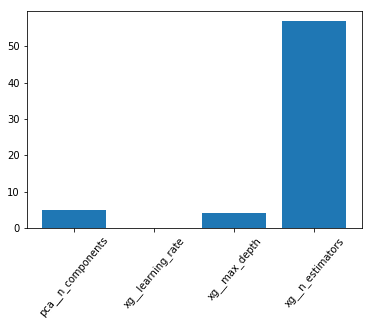

In [46]:
plt.bar(rs.best_params_.keys(), rs.best_params_.values())
plt.xticks(rotation=50)

Bayesian Optimization

In [47]:
para_set = {
           'learning_rate':  (0.3, 0.9),                 
           'n_estimators':   (60,90),               
           'max_depth':      (3,5),                 
           'n_components' :  (5,7)          
            }

In [48]:
def xg_eval(learning_rate,n_estimators, max_depth,n_components):
    #Pipeling for Bayesian Optimization
    pipe_xg1 = make_pipeline (ss(),
                              PCA(n_components=int(round(n_components))),
                              XGBClassifier(
                                           silent = False,
                                           n_jobs=2,
                                           learning_rate=learning_rate,
                                           max_depth=int(round(max_depth)),
                                           n_estimators=int(round(n_estimators))
                                           )
                             )
    #Fitting into pipeline 
    cv_result = cross_val_score(estimator = pipe_xg1,
                                X= X_train,
                                y = y_train,
                                cv = 2,
                                n_jobs = 2,
                                scoring = 'f1'
                                ).mean()             # taking mean of all results

    return cv_result       #Returning final mean of all results of cross val score


In [49]:
xgBO = BayesianOptimization(
                             xg_eval, 
                             para_set 
                             )

In [50]:
start = time.time()
xgBO.maximize(init_points=5,    
               n_iter=25,        
               )
end = time.time()
(end-start)/60

|   iter    |  target   | learni... | max_depth | n_comp... | n_esti... |
-------------------------------------------------------------------------
|  1        |  0.9921   |  0.6464   |  3.611    |  6.898    |  86.7     |
|  2        |  0.9922   |  0.8765   |  3.697    |  5.486    |  77.9     |
|  3        |  0.9917   |  0.8574   |  3.051    |  6.462    |  63.83    |
|  4        |  0.9918   |  0.5802   |  3.097    |  6.71     |  75.36    |
|  5        |  0.9914   |  0.6642   |  4.166    |  5.541    |  89.74    |
|  6        |  0.9918   |  0.8496   |  4.872    |  5.19     |  60.03    |
|  7        |  0.9928   |  0.7456   |  4.828    |  6.785    |  60.03    |
|  8        |  0.9921   |  0.4465   |  3.185    |  5.247    |  60.0     |
|  9        |  0.9918   |  0.3995   |  4.363    |  5.708    |  89.99    |
|  10       |  0.9931   |  0.8403   |  3.231    |  6.911    |  60.01    |
|  11       |  0.9916   |  0.6471   |  4.999    |  6.884    |  60.07    |
|  12       |  0.9918   |  0.6994   | 

3.9614618460337323

In [51]:
#Results
xgBO.res

[{'target': 0.9920913877221664,
  'params': {'learning_rate': 0.6463538825546296,
   'max_depth': 3.610894830698333,
   'n_components': 6.897962678393256,
   'n_estimators': 86.69566978460425}},
 {'target': 0.9922391723064656,
  'params': {'learning_rate': 0.876539897409502,
   'max_depth': 3.696799628611975,
   'n_components': 5.485861370481003,
   'n_estimators': 77.90267533220103}},
 {'target': 0.9916684145577015,
  'params': {'learning_rate': 0.8573794462595228,
   'max_depth': 3.0506478332843594,
   'n_components': 6.462232713249772,
   'n_estimators': 63.83015386128585}},
 {'target': 0.9918104708979234,
  'params': {'learning_rate': 0.5801552514828627,
   'max_depth': 3.0967354155293068,
   'n_components': 6.709761560837301,
   'n_estimators': 75.36275387145655}},
 {'target': 0.9913676333341895,
  'params': {'learning_rate': 0.6642040332107989,
   'max_depth': 4.166269967223274,
   'n_components': 5.541448485085536,
   'n_estimators': 89.73967175608936}},
 {'target': 0.9917987335

In [52]:
#Best parametrs in maximizing the objective:
xgBO.max

{'target': 0.9931240765716862,
 'params': {'learning_rate': 0.8402829324641932,
  'max_depth': 3.231330897734291,
  'n_components': 6.911408231009479,
  'n_estimators': 60.0062880774019}}

In [53]:
for features in xgBO.max.values():
        print(features)

0.9931240765716862
{'learning_rate': 0.8402829324641932, 'max_depth': 3.231330897734291, 'n_components': 6.911408231009479, 'n_estimators': 60.0062880774019}


([0, 1, 2, 3], <a list of 4 Text xticklabel objects>)

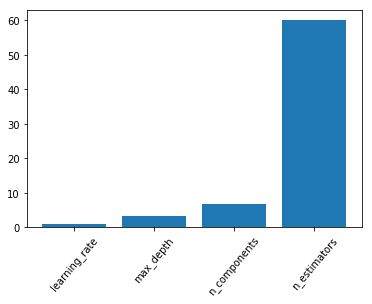

In [54]:
plt.bar(features.keys(), features.values())
plt.xticks(rotation=50)

Fitting parameters in model

In [55]:
# Model with parameters of grid search
model_gs = XGBClassifier(
                    learning_rate = clf.best_params_['xg__learning_rate'],
                    max_depth = clf.best_params_['xg__max_depth'],
                    n_estimators=clf.best_params_['xg__n_estimators']
                    )

#  Model with parameters of random search
model_rs = XGBClassifier(
                    learning_rate = rs.best_params_['xg__learning_rate'],
                    max_depth = rs.best_params_['xg__max_depth'],
                    n_estimators=rs.best_params_['xg__n_estimators']
                    )

#  Model with parameters of Bayesian Optimization
model_bo = XGBClassifier(
                    learning_rate = xgBO.max['params']['learning_rate'],
                    max_depth = int(xgBO.max['params']['max_depth']),
                    n_estimators= int(xgBO.max['params']['n_estimators'])
                    )

In [56]:
start = time.time()
model_gs.fit(X_train, y_train)
model_rs.fit(X_train, y_train)
model_bo.fit(X_train, y_train)
end = time.time()
(end - start)/60

0.012507073084513346

In [57]:
# Predictions with all the models
y_pred_gs = model_gs.predict(X_test)
y_pred_rs = model_rs.predict(X_test)
y_pred_bo = model_bo.predict(X_test)

In [58]:
# Accuracy of all the models
accuracy_gs = accuracy_score(y_test, y_pred_gs)
accuracy_rs = accuracy_score(y_test, y_pred_rs)
accuracy_bo = accuracy_score(y_test, y_pred_bo)
print("Accuracy by Grid Search           = ",accuracy_gs)
print("Accuracy by Random Search         = ",accuracy_rs)
print("Accuracy by Bayesian Optimization = ",accuracy_bo)

Accuracy by Grid Search           =  0.9963898916967509
Accuracy by Random Search         =  0.9927797833935018
Accuracy by Bayesian Optimization =  0.9963898916967509


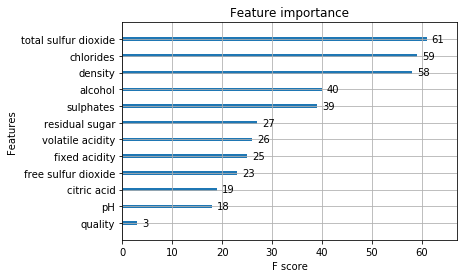

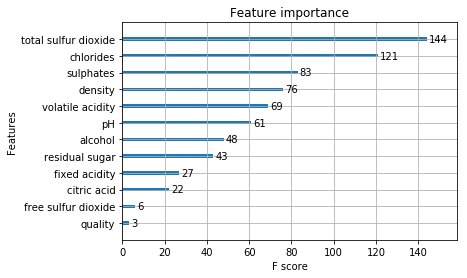

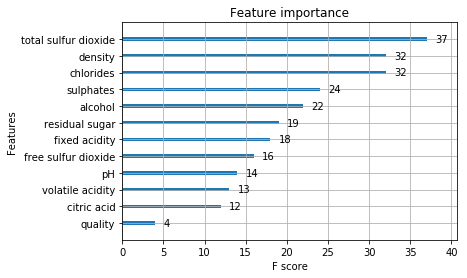

In [59]:
# Get feature importances from all the models
model_gs.feature_importances_
model_rs.feature_importances_
model_bo.feature_importances_
plot_importance(model_gs)
plot_importance(model_rs)
plot_importance(model_bo)

# Confusion matrix for all the models

In [60]:
#Confusion Matrix for Grid Search model
confusion_matrix(y_test,y_pred_gs)

array([[ 479,    4],
       [   3, 1453]])

In [61]:
#Confusion Matrix for Random Search model
confusion_matrix(y_test,y_pred_rs)

array([[ 473,   10],
       [   4, 1452]])

In [62]:
#Confusion Matrix for Bayesian Optimization model
confusion_matrix(y_test,y_pred_bo)

array([[ 479,    4],
       [   3, 1453]])

In [63]:
# Get probability of occurrence of each class
y_pred_prob_gs = model_gs.predict_proba(X_test)
y_pred_prob_rs = model_rs.predict_proba(X_test)
y_pred_prob_bo = model_bo.predict_proba(X_test)

# Draw ROC curve

In [64]:
# calculate fpr, tpr values
fpr_gs, tpr_gs, thresholds = roc_curve(y_test,
                                 y_pred_prob_gs[: , 1],
                                 pos_label= 1
                                 )

fpr_rs, tpr_rs, thresholds = roc_curve(y_test,
                                 y_pred_prob_rs[: , 1],
                                 pos_label= 1
                                 )

fpr_bo, tpr_bo, thresholds = roc_curve(y_test,
                                 y_pred_prob_bo[: , 1],
                                 pos_label= 1
                                 )



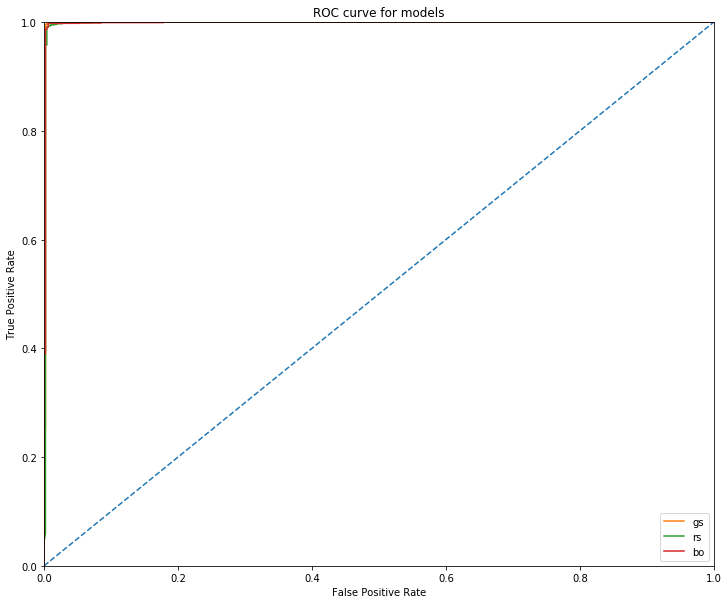

In [65]:
fig = plt.figure(figsize=(12,10))  
ax = fig.add_subplot(111)   # Create axes

#Connect diagonals
ax.plot([0, 1], [0, 1], ls="--")  

#Labels 
ax.set_xlabel('False Positive Rate')  
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve for models')

#Set graph limits
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])

#Plot each graph now
ax.plot(fpr_gs, tpr_gs, label = "gs")
ax.plot(fpr_rs, tpr_rs, label = "rs")
ax.plot(fpr_bo, tpr_bo, label = "bo")


#Set legend and show plot
ax.legend(loc="lower right")
plt.show()


In [66]:
# Calculate AUC
auc_gs = auc(fpr_gs,tpr_gs)
auc_rs = auc(fpr_rs,tpr_rs)
auc_bo = auc(fpr_bo,tpr_bo)

In [67]:
#Calculate Precision, Recall and F1 Score
from sklearn.metrics import precision_recall_fscore_support
precision_gs,recall_gs,f1_gs,_ = precision_recall_fscore_support(y_test,y_pred_gs)
precision_rs,recall_rs,f1_rs,_ = precision_recall_fscore_support(y_test,y_pred_rs)
precision_bo,recall_bo,f1_bo,_ = precision_recall_fscore_support(y_test,y_pred_bo)

# Performance Comparision of all models

In [68]:
pc = pd.DataFrame({ "Classifiers":["Grid Search","Random Search",'Bayesian Optimization'],
                             "Accuracy": [accuracy_gs,accuracy_rs,accuracy_bo],
                             "Precision": [precision_gs,precision_rs,precision_bo],
                             "Recall":[recall_gs,recall_rs,recall_bo],
                             "f1_score":[f1_gs,f1_rs,f1_bo],
                             "AUC":[auc_gs,auc_rs,auc_bo]})
pc

,Classifiers,Accuracy,Precision,Recall,f1_score,AUC
0,Grid Search,0.99639,"[0.9937759336099585, 0.997254632807138]","[0.9917184265010351, 0.9979395604395604]","[0.9927461139896373, 0.997596979059389]",0.998329
1,Random Search,0.99278,"[0.9916142557651991, 0.9931600547195623]","[0.979296066252588, 0.9972527472527473]","[0.9854166666666667, 0.9952021932830706]",0.997811
2,Bayesian Optimization,0.99639,"[0.9937759336099585, 0.997254632807138]","[0.9917184265010351, 0.9979395604395604]","[0.9927461139896373, 0.997596979059389]",0.998488
